In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\bhara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("C:\data\credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [5]:
df.duplicated().sum()

165

In [6]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [10]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [11]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
[features for features in df.columns if df[features].isna().sum()>0]

['person_emp_length', 'loan_int_rate']

In [13]:
df[df.person_emp_length.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [14]:
df[df.loan_int_rate.isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [15]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
x=round(df.person_emp_length.mean(),2)
y=round(df.loan_int_rate.mean(),2)
x,y

(4.79, 11.02)

In [18]:
df.person_emp_length.replace(np.nan,x,inplace=True)

In [19]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [20]:
df.loan_int_rate.replace(np.nan,y,inplace=True)

In [21]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


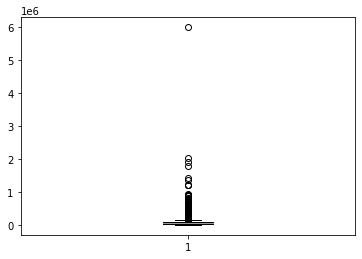

In [24]:
plt.boxplot(df.person_income);

In [25]:
df.skew()

person_age                     2.580490
person_income                 32.958748
person_emp_length              2.656519
loan_amnt                      1.191944
loan_int_rate                  0.217398
loan_status                    1.361172
loan_percent_income            1.063811
cb_person_cred_hist_length     1.659369
dtype: float64

In [26]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


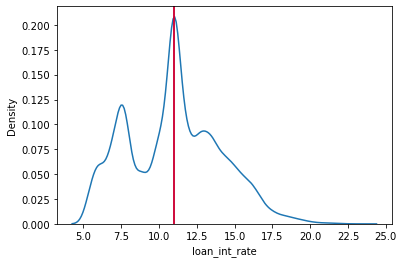

In [27]:
sns.kdeplot(df.loan_int_rate)
plt.axvline(np.mean(df.loan_int_rate), color = 'blue')
plt.axvline(np.median(df.loan_int_rate), color = 'red');

In [28]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


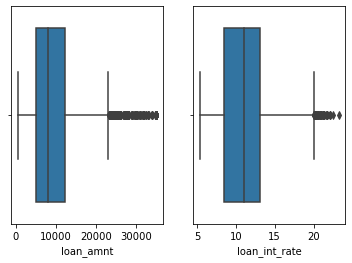

In [29]:
plt.subplot(121)
sns.boxplot(df.loan_amnt)
plt.subplot(122)
sns.boxplot(df.loan_int_rate);

<AxesSubplot:xlabel='cb_person_cred_hist_length'>

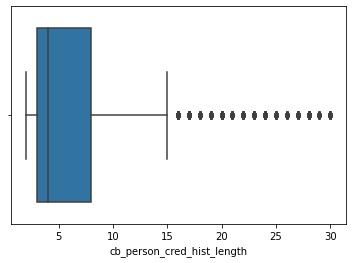

In [30]:
sns.boxplot(df.cb_person_cred_hist_length)

In [31]:
from scipy.stats import zscore
from scipy import stats

In [32]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [33]:
df['zscore_age']=stats.zscore(df.person_age)

In [34]:
df=df.loc[df['zscore_age'].abs()< 3]

In [35]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,zscore_age
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,-0.904471
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,-1.061852
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.432327
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,-0.747089
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.589708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12,1.613628
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13,1.613628
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13,1.298865
32295,42,101000,MORTGAGE,6.0,DEBTCONSOLIDATION,F,25000,16.15,1,0.25,Y,14,2.243152


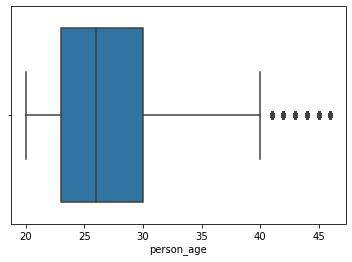

In [36]:
sns.boxplot(df.person_age);

In [37]:
Q1,Q2,Q3=tuple(df.person_age.quantile(q=[0.25,0.5,0.75]).values)

In [38]:
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)

In [39]:
IQR,UL,LL

(7.0, 40.5, 12.5)

In [40]:
drop_list=df[(df.person_age < LL)|(df.person_age > UL)].index.tolist()

In [41]:
df.drop(drop_list,inplace=True)

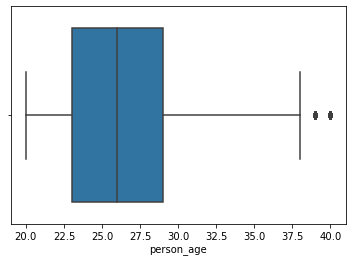

In [42]:
sns.boxplot(df.person_age);

In [43]:
Q1,Q2,Q3=tuple(df.person_age.quantile(q=[0.25,0.5,0.75]).values)

In [44]:
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL

(6.0, 38.0, 14.0)

In [45]:
drop_list=df[(df.person_age < LL)|(df.person_age > UL)].index.tolist()

In [46]:
df.drop(drop_list,inplace=True)

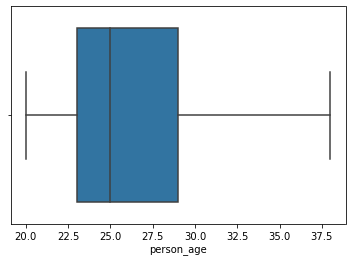

In [47]:
sns.boxplot(df.person_age);

In [48]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,zscore_age
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,-0.904471
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,-1.061852
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.432327
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,-0.747089
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,-0.589708


In [49]:
df['zscore_income']=stats.zscore(df.person_income)

In [50]:
df=df.loc[df['zscore_income'].abs()<3]

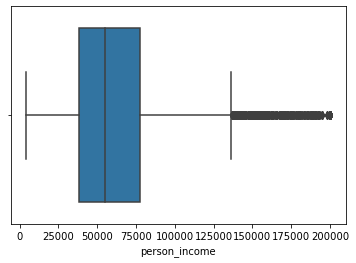

In [51]:
sns.boxplot(df.person_income);

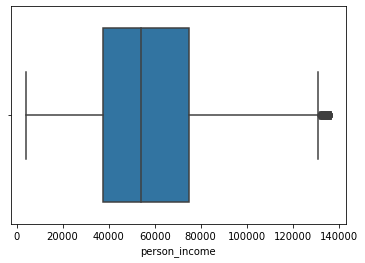

In [52]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

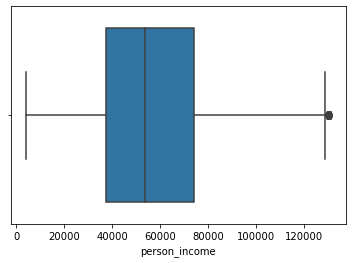

In [53]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

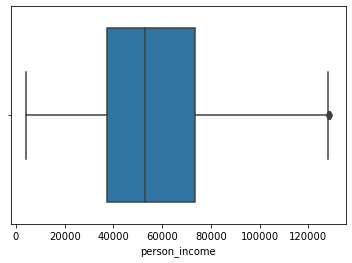

In [54]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

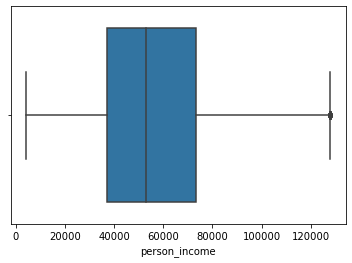

In [55]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

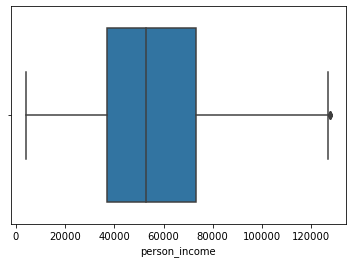

In [56]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

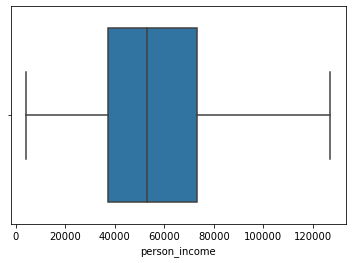

In [57]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

In [58]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
zscore_age                    float64
zscore_income                 float64
dtype: object

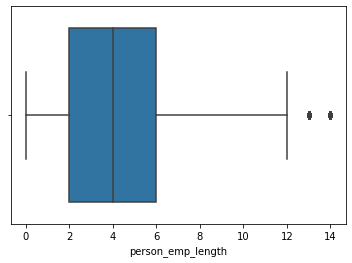

In [59]:
Q1,Q2,Q3=tuple(df.person_emp_length.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_emp_length < LL)|(df.person_emp_length > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_emp_length);

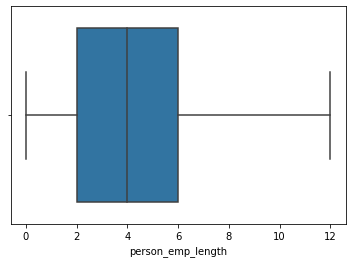

In [60]:
Q1,Q2,Q3=tuple(df.person_emp_length.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_emp_length < LL)|(df.person_emp_length > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_emp_length);

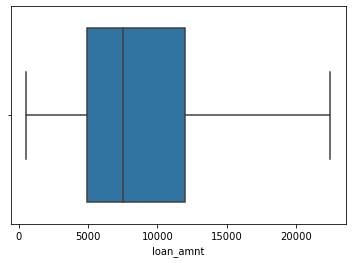

In [61]:
Q1,Q2,Q3=tuple(df.loan_amnt.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_amnt < LL)|(df.loan_amnt > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_amnt);

In [62]:
df.skew()

person_age                    0.979165
person_income                 0.663678
person_emp_length             0.514106
loan_amnt                     0.701132
loan_int_rate                 0.189258
loan_status                   1.344127
loan_percent_income           1.063337
cb_person_cred_hist_length    1.360292
zscore_age                    0.979165
zscore_income                 0.663678
dtype: float64

In [63]:
df.shape

(26326, 14)

In [64]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,zscore_age,zscore_income
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,-1.061852,-1.221105
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,-0.432327,-1.221105
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,-1.061852,-1.214473
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,-1.061852,-1.212263
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N,2,-1.061852,-1.212263


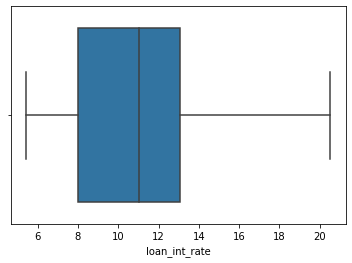

In [65]:
Q1,Q2,Q3=tuple(df.loan_int_rate.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_int_rate < LL)|(df.loan_int_rate > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_int_rate);

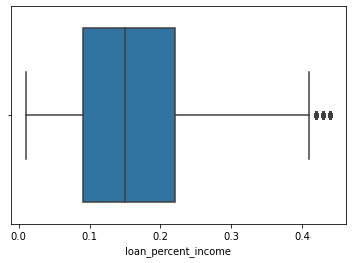

In [66]:
Q1,Q2,Q3=tuple(df.loan_percent_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_percent_income < LL)|(df.loan_percent_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_percent_income);

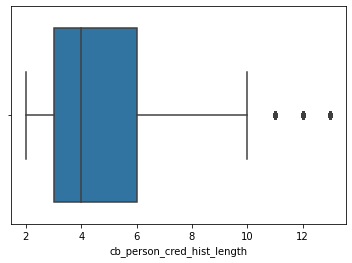

In [67]:
Q1,Q2,Q3=tuple(df.cb_person_cred_hist_length.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.cb_person_cred_hist_length < LL)|(df.cb_person_cred_hist_length > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.cb_person_cred_hist_length);

In [68]:
df.shape

(25248, 14)

In [69]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,zscore_age,zscore_income
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,-1.061852,-1.221105
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,-1.061852,-1.214473
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,-1.061852,-1.212263
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2,-0.589708,-1.194578
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3,-0.589708,-1.190599


<AxesSubplot:xlabel='person_income'>

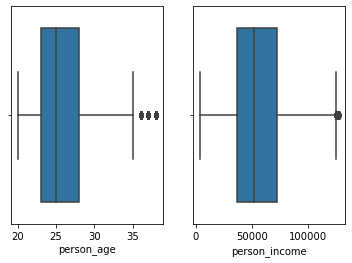

In [70]:
plt.subplot(121)
sns.boxplot(df.person_age)
plt.subplot(122)
sns.boxplot(df.person_income)

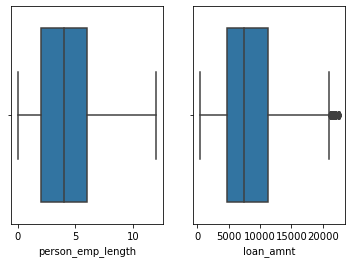

In [71]:
plt.subplot(121)
sns.boxplot(df.person_emp_length)
plt.subplot(122)
sns.boxplot(df.loan_amnt);

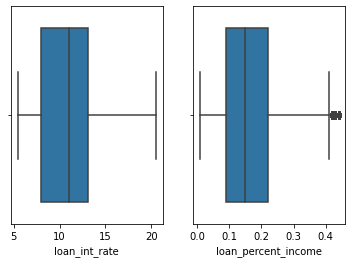

In [72]:
plt.subplot(121)
sns.boxplot(df.loan_int_rate)
plt.subplot(122)
sns.boxplot(df.loan_percent_income);

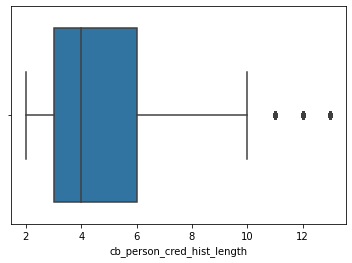

In [73]:

sns.boxplot(df.cb_person_cred_hist_length);


In [74]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,zscore_age,zscore_income
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,-1.061852,-1.221105
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,-1.061852,-1.214473
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,-1.061852,-1.212263
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2,-0.589708,-1.194578
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3,-0.589708,-1.190599


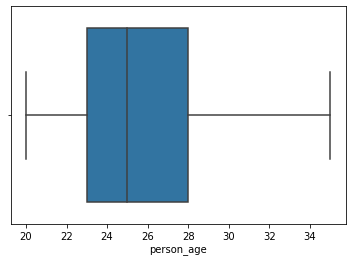

In [75]:
Q1,Q2,Q3=tuple(df.person_age.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_age < LL)|(df.person_age > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_age);

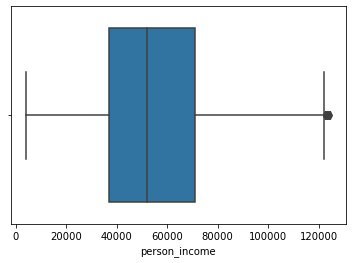

In [76]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

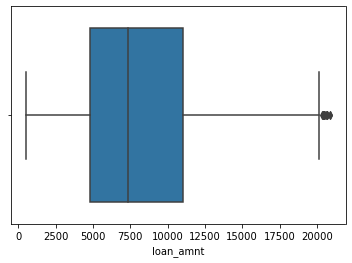

In [77]:
Q1,Q2,Q3=tuple(df.loan_amnt.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_amnt < LL)|(df.loan_amnt > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_amnt);

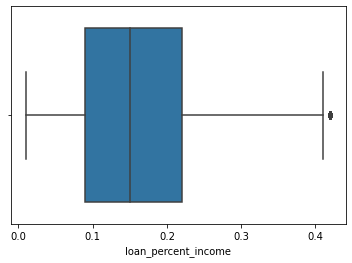

In [78]:
Q1,Q2,Q3=tuple(df.loan_percent_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_percent_income < LL)|(df.loan_percent_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_percent_income);

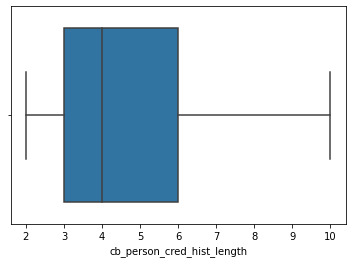

In [79]:
Q1,Q2,Q3=tuple(df.cb_person_cred_hist_length.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.cb_person_cred_hist_length < LL)|(df.cb_person_cred_hist_length > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.cb_person_cred_hist_length);

<AxesSubplot:xlabel='person_income'>

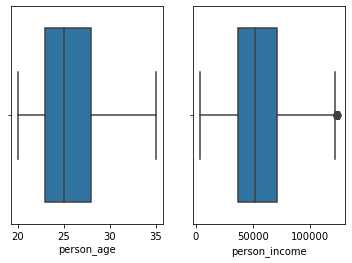

In [80]:
plt.subplot(121)
sns.boxplot(df.person_age)
plt.subplot(122)
sns.boxplot(df.person_income)

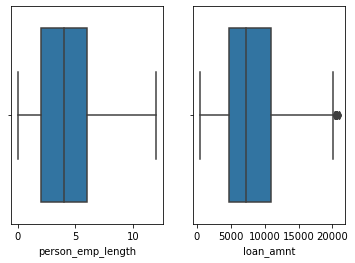

In [81]:
plt.subplot(121)
sns.boxplot(df.person_emp_length)
plt.subplot(122)
sns.boxplot(df.loan_amnt);

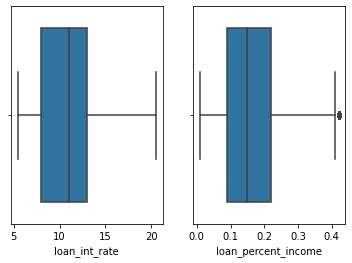

In [82]:
plt.subplot(121)
sns.boxplot(df.loan_int_rate)
plt.subplot(122)
sns.boxplot(df.loan_percent_income);

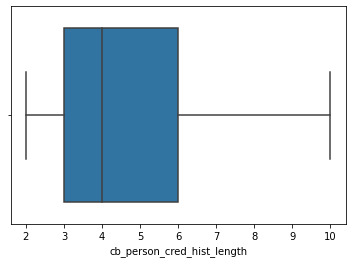

In [83]:
sns.boxplot(df.cb_person_cred_hist_length);

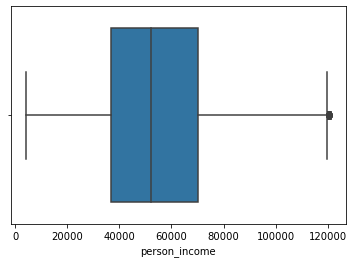

In [84]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

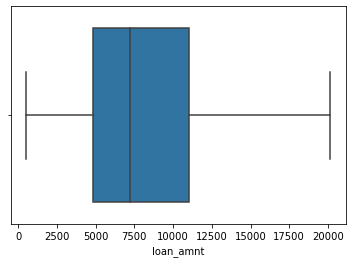

In [85]:
Q1,Q2,Q3=tuple(df.loan_amnt.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_amnt < LL)|(df.loan_amnt > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_amnt);

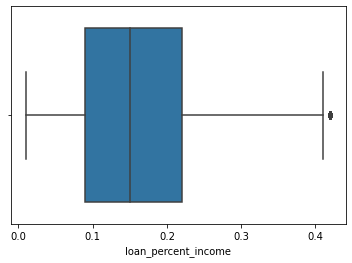

In [86]:
Q1,Q2,Q3=tuple(df.loan_percent_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_percent_income < LL)|(df.loan_percent_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_percent_income);

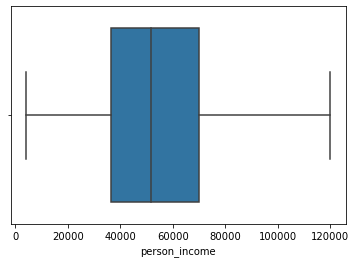

In [87]:
Q1,Q2,Q3=tuple(df.person_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.person_income < LL)|(df.person_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.person_income);

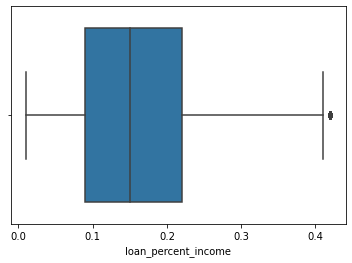

In [88]:
Q1,Q2,Q3=tuple(df.loan_percent_income.quantile(q=[0.25,0.5,0.75]).values)
IQR=round((Q3-Q1),2)
UL=round((Q3+1.5*IQR),2)
LL=round((Q1-1.5*IQR),2)
IQR,UL,LL
drop_list=df[(df.loan_percent_income < LL)|(df.loan_percent_income > UL)].index.tolist()
df.drop(drop_list,inplace=True)
sns.boxplot(df.loan_percent_income);

<AxesSubplot:xlabel='person_income'>

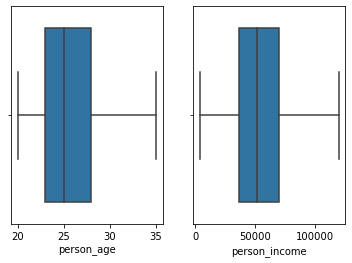

In [89]:
plt.subplot(121)
sns.boxplot(df.person_age)
plt.subplot(122)
sns.boxplot(df.person_income)

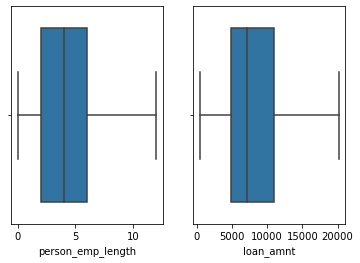

In [90]:
plt.subplot(121)
sns.boxplot(df.person_emp_length)
plt.subplot(122)
sns.boxplot(df.loan_amnt);

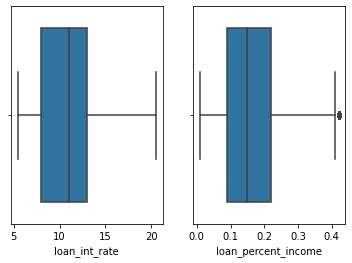

In [91]:
plt.subplot(121)
sns.boxplot(df.loan_int_rate)
plt.subplot(122)
sns.boxplot(df.loan_percent_income);

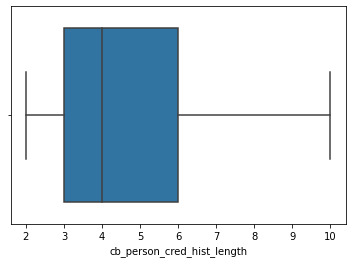

In [92]:
sns.boxplot(df.cb_person_cred_hist_length);

In [93]:
df.skew()

person_age                    0.812828
person_income                 0.598455
person_emp_length             0.506011
loan_amnt                     0.683871
loan_int_rate                 0.159201
loan_status                   1.432599
loan_percent_income           0.681938
cb_person_cred_hist_length    0.869120
zscore_age                    0.812828
zscore_income                 0.598455
dtype: float64

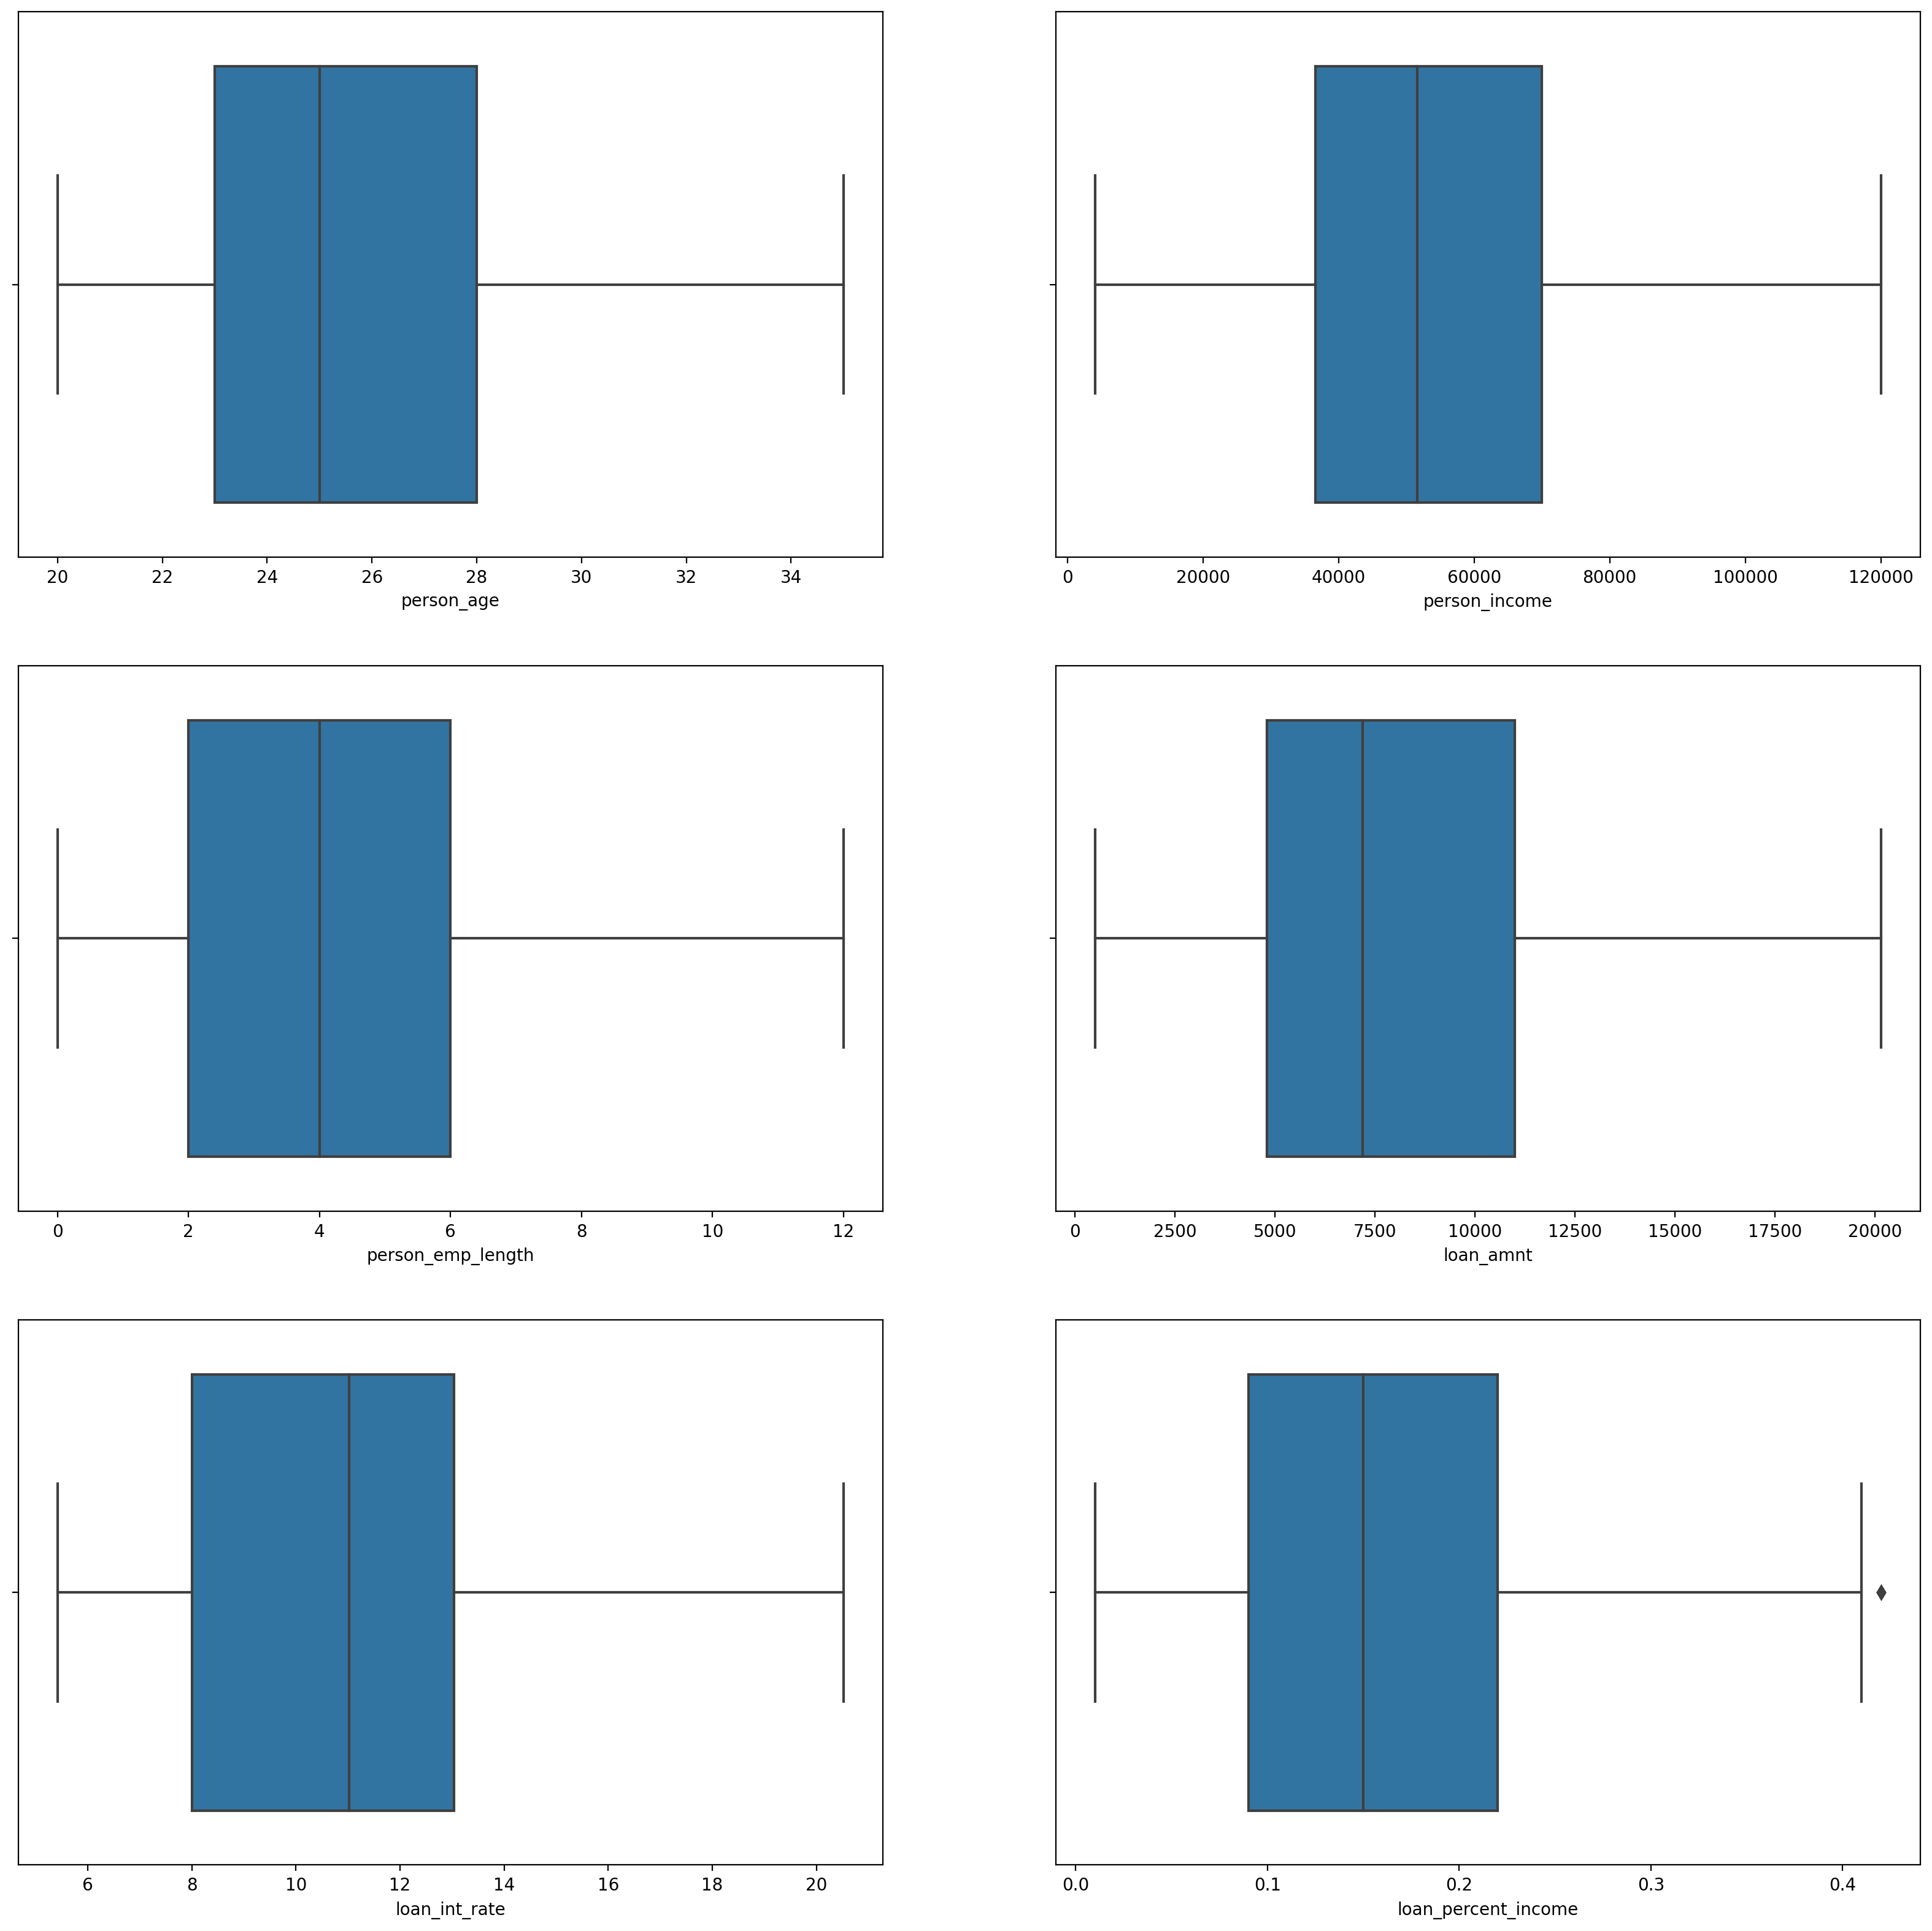

In [94]:
plt.figure(figsize=(20,20),dpi=200)
plt.subplot(321)
sns.boxplot(df.person_age)
plt.subplot(322)
sns.boxplot(df.person_income)
plt.subplot(323)
sns.boxplot(df.person_emp_length)
plt.subplot(324)
sns.boxplot(df.loan_amnt);
plt.subplot(325)
sns.boxplot(df.loan_int_rate)
plt.subplot(326)
sns.boxplot(df.loan_percent_income);

<AxesSubplot:xlabel='loan_status'>

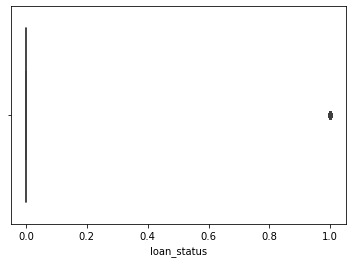

In [95]:
sns.boxplot(df.loan_status)

In [96]:
df.drop(['zscore_age','zscore_income'],axis=1,inplace=True)

In [97]:
df.shape

(24223, 12)

In [98]:
df.to_csv("C:\data\loan_cleaned_df.csv")

In [99]:
loan_df=pd.read_csv("C:\data\loan_cleaned_df.csv")

In [100]:
loan_df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
2,9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
3,19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
4,23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [101]:
loan_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [102]:
loan_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
2,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
3,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
4,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [103]:
loan_df.person_home_ownership.value_counts()

RENT        13052
MORTGAGE     9211
OWN          1882
OTHER          78
Name: person_home_ownership, dtype: int64

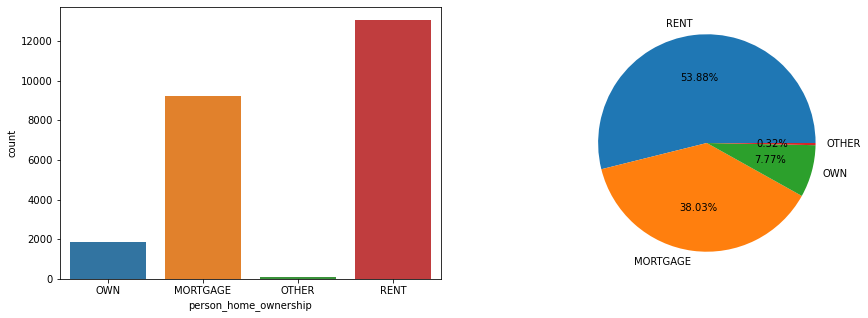

In [104]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=df.person_home_ownership)
plt.subplot(122)
plt.pie(loan_df.person_home_ownership.value_counts(),labels=loan_df.person_home_ownership.value_counts().index,autopct='%.2f%%');

<AxesSubplot:xlabel='person_income'>

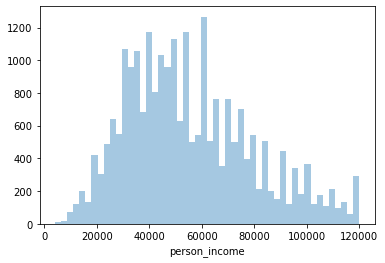

In [105]:
sns.distplot(loan_df.person_income,kde=False)

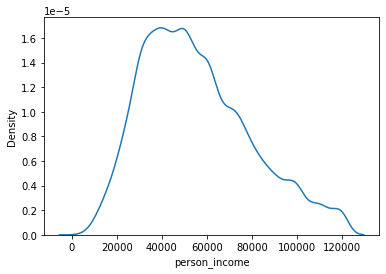

In [106]:
sns.distplot(loan_df.person_income,hist=False);

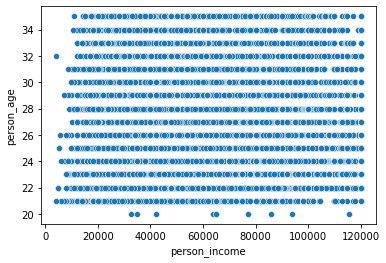

In [107]:
sns.scatterplot(loan_df.person_income,y=loan_df.person_age,data=loan_df);

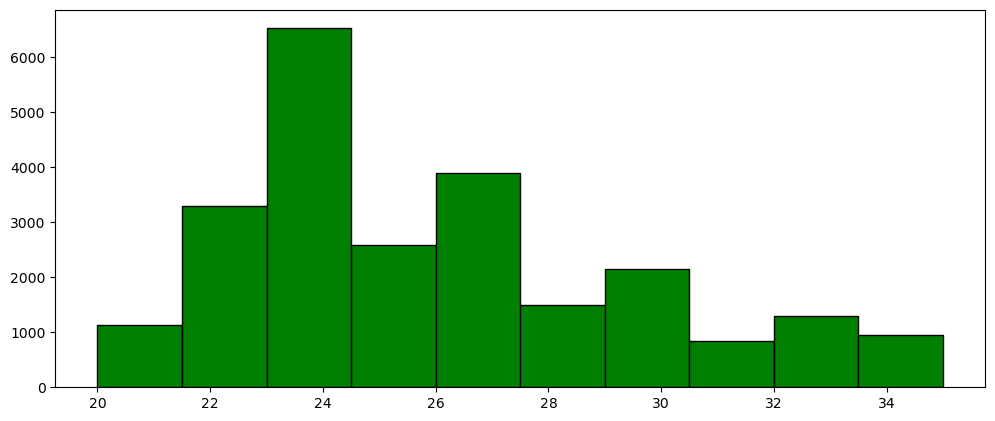

In [108]:
plt.figure(figsize=(12,5), dpi = 100)
plt.hist(loan_df.person_age, color = 'green', edgecolor = 'black')
plt.show();

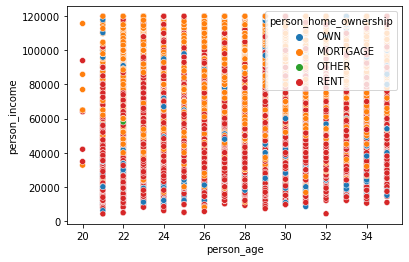

In [109]:
sns.scatterplot(x=loan_df.person_age,y=loan_df.person_income,hue=loan_df.person_home_ownership);


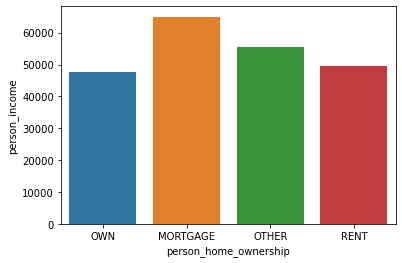

In [110]:
sns.barplot(x=loan_df.person_home_ownership,y=loan_df.person_income,ci=False);

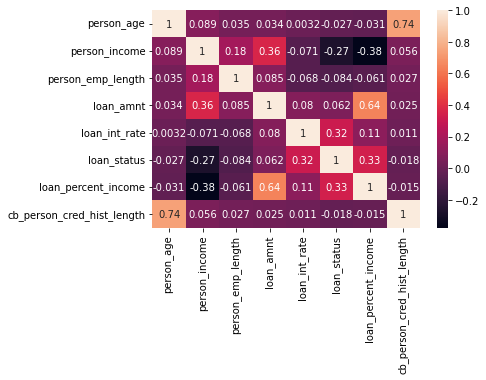

In [111]:
sns.heatmap(loan_df.corr(),annot=True);

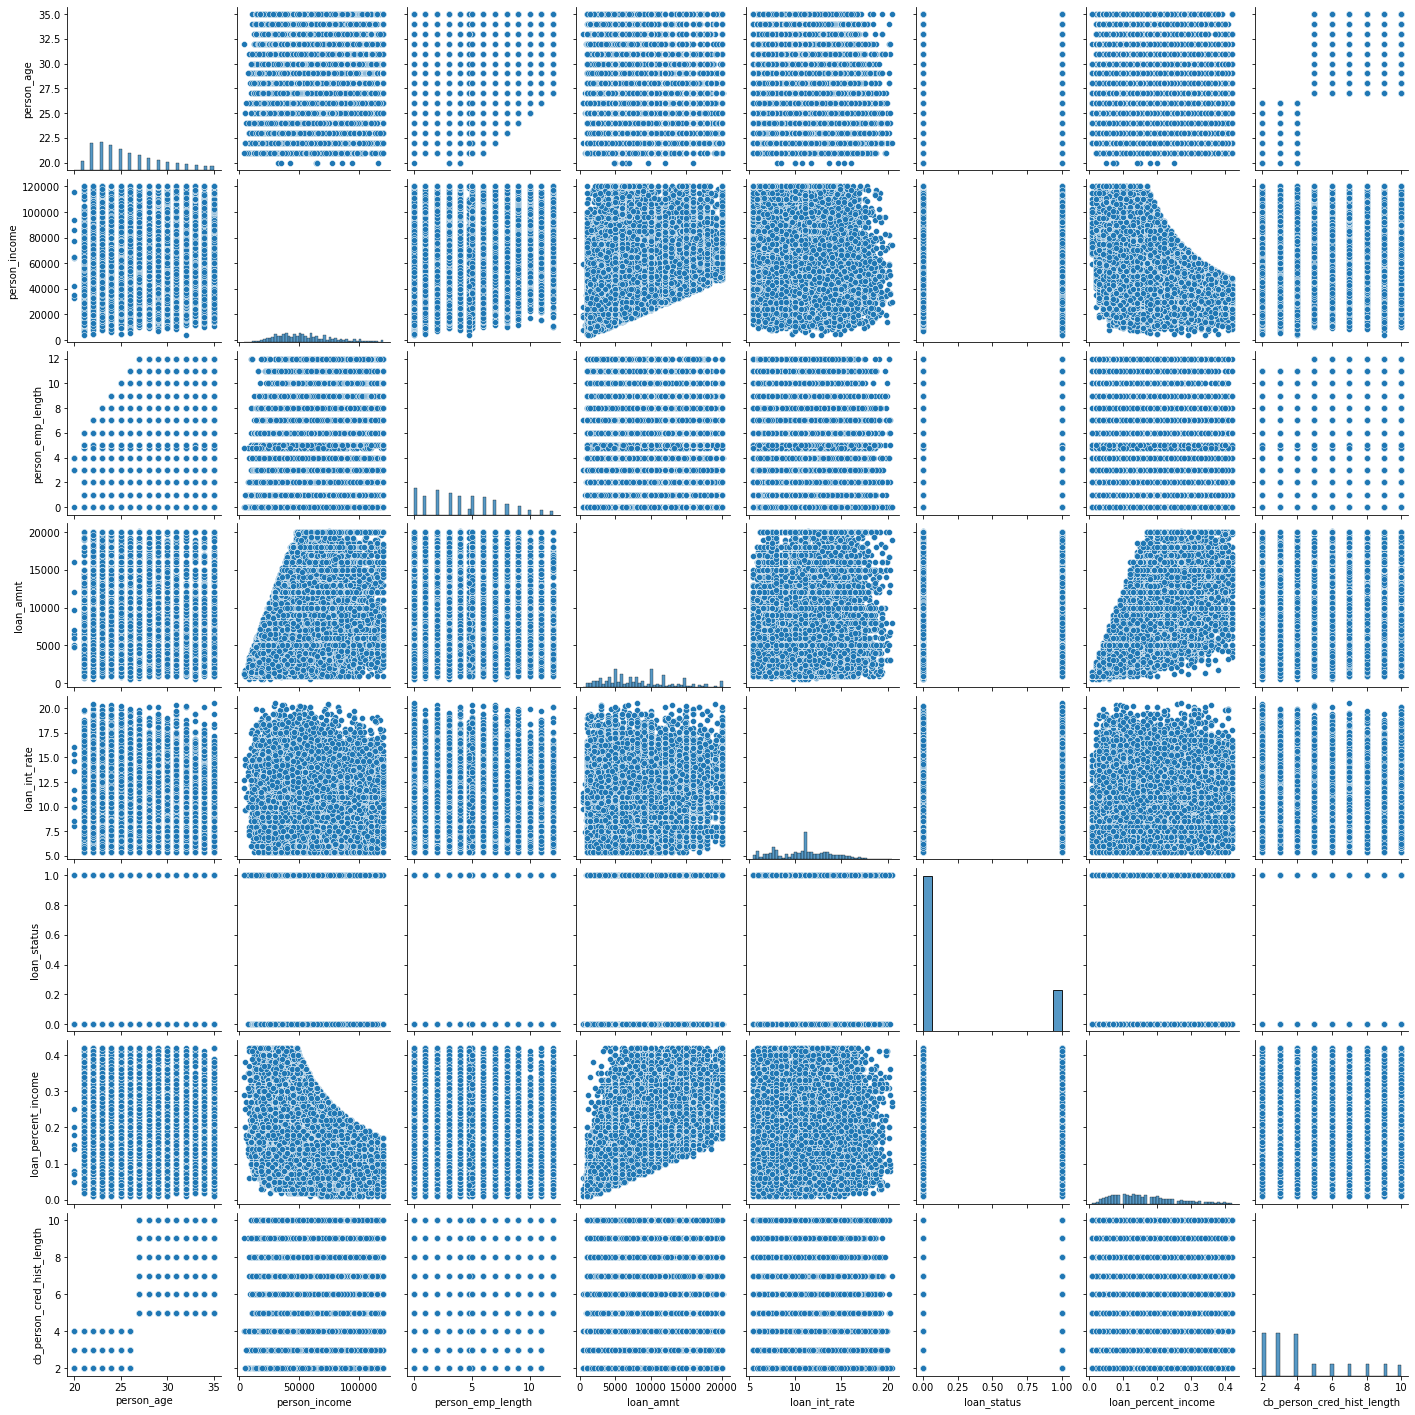

In [112]:
sns.pairplot(loan_df);

In [113]:
loan_df.skew()

person_age                    0.812828
person_income                 0.598455
person_emp_length             0.506011
loan_amnt                     0.683871
loan_int_rate                 0.159201
loan_status                   1.432599
loan_percent_income           0.681938
cb_person_cred_hist_length    0.869120
dtype: float64

In [114]:
loan_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
2,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
3,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
4,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24218,31,83000,MORTGAGE,9.0,VENTURE,F,18000,19.74,1,0.22,Y,8
24219,29,61656,RENT,4.0,PERSONAL,A,15000,6.91,0,0.24,N,9
24220,32,30000,RENT,1.0,EDUCATION,B,11450,9.99,1,0.38,N,6
24221,31,26010,MORTGAGE,2.0,PERSONAL,B,6500,9.99,0,0.25,N,9


# Machine Learning

# split the data

In [115]:
y = loan_df['loan_status']
X = loan_df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt',
          'loan_int_rate','cb_person_default_on_file','loan_percent_income','cb_person_cred_hist_length']]

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(18167, 11) (18167,)
(6056, 11) (6056,)


In [117]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,loan_percent_income,cb_person_cred_hist_length
4908,23,88000,RENT,1.00,VENTURE,B,5000,10.99,N,0.06,4
9637,24,68069,MORTGAGE,4.79,VENTURE,A,8100,11.02,N,0.12,4
13017,24,35000,RENT,4.00,PERSONAL,D,14400,15.70,N,0.41,4
8275,22,60000,RENT,6.00,PERSONAL,B,8000,11.14,N,0.13,3
21841,30,29102,RENT,2.00,VENTURE,A,3000,7.90,N,0.10,9


In [118]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
cb_person_default_on_file      object
loan_percent_income           float64
cb_person_cred_hist_length      int64
dtype: object

# Saperating the Numerical and Catagorical columns

In [119]:
X_train_cat=X_train.select_dtypes(include=['object']) # catagorica columns

In [120]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
4908,RENT,VENTURE,B,N
9637,MORTGAGE,VENTURE,A,N
13017,RENT,PERSONAL,D,N
8275,RENT,PERSONAL,B,N
21841,RENT,VENTURE,A,N


In [121]:
X_train_num=X_train.select_dtypes(include=['float64','int64']) # numerical columns

In [122]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
4908,23,88000,1.00,5000,10.99,0.06,4
9637,24,68069,4.79,8100,11.02,0.12,4
13017,24,35000,4.00,14400,15.70,0.41,4
8275,22,60000,6.00,8000,11.14,0.13,3
21841,30,29102,2.00,3000,7.90,0.10,9


# StandardScaler

In [123]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
4908,-0.783398,1.352005,-1.032371,-0.678751,0.025131,-1.118294,-0.237535
9637,-0.501493,0.526953,0.200073,-0.011533,0.035043,-0.461649,-0.237535
13017,-0.501493,-0.841951,-0.056822,1.344426,1.581322,2.712136,-0.237535
8275,-1.065303,0.192934,0.593545,-0.033057,0.074691,-0.352208,-0.644946
21841,1.189939,-1.086101,-0.707188,-1.109215,-0.995810,-0.680531,1.799520


In [124]:
X_train_num_transformed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,1.816700e+04,1.816700e+04,1.816700e+04,1.816700e+04,1.816700e+04,1.816700e+04,1.816700e+04
mean,4.341402e-17,-1.564469e-18,-7.225891e-17,1.447134e-17,-3.715614e-16,-2.514884e-16,1.818695e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.629114e+00,-2.121897e+00,-1.357554e+00,-1.647294e+00,-1.815206e+00,-1.665499e+00,-1.052357e+00
25%,-7.833979e-01,-7.739800e-01,-7.071877e-01,-7.217977e-01,-9.627702e-01,-7.899718e-01,-6.449459e-01
50%,-2.195873e-01,-1.547875e-01,-5.682156e-02,-2.052419e-01,3.504272e-02,-1.333266e-01,-2.375349e-01
75%,6.261287e-01,6.068880e-01,5.935445e-01,6.126382e-01,7.090621e-01,6.327594e-01,5.772871e-01
max,2.599466e+00,2.676658e+00,2.544643e+00,2.560484e+00,3.173858e+00,2.821577e+00,2.206931e+00


In [125]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
Mean of each column: [2.57789398e+01 5.53392434e+04 4.17473716e+00 8.15358617e+03
 1.09139390e+01 1.62182529e-01 4.58303517e+00]
Std of each column: [3.54729018e+00 2.41572683e+04 3.07519101e+00 4.64615779e+03
 3.02661937e+00 9.13735492e-02 2.45452381e+00]


# OneHotEncoder

In [126]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
4908,RENT,VENTURE,B,N
9637,MORTGAGE,VENTURE,A,N
13017,RENT,PERSONAL,D,N
8275,RENT,PERSONAL,B,N
21841,RENT,VENTURE,A,N


In [127]:
X_train_cat['person_home_ownership'].value_counts(normalize=True)

RENT        0.538889
MORTGAGE    0.379149
OWN         0.078934
OTHER       0.003027
Name: person_home_ownership, dtype: float64

In [128]:
X_train_cat['loan_intent'].value_counts(normalize=True)

EDUCATION            0.208345
MEDICAL              0.189079
VENTURE              0.175813
PERSONAL             0.164969
DEBTCONSOLIDATION    0.161447
HOMEIMPROVEMENT      0.100347
Name: loan_intent, dtype: float64

In [129]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize=True)

N    0.826609
Y    0.173391
Name: cb_person_default_on_file, dtype: float64

In [130]:
X_train_cat_ohe_df=X_train_cat.drop(['loan_grade'],axis=1)

In [131]:
X_train_cat_ohe_df.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
4908,RENT,VENTURE,N
9637,MORTGAGE,VENTURE,N
13017,RENT,PERSONAL,N
8275,RENT,PERSONAL,N
21841,RENT,VENTURE,N


In [132]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_ohe_df), 
                               columns=encoder.get_feature_names_out(X_train_cat_ohe_df.columns), 
                               index = X_train_cat_ohe_df.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
4908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13017,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8275,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21841,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


 # Label Encoding

In [133]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
4908,RENT,VENTURE,B,N
9637,MORTGAGE,VENTURE,A,N
13017,RENT,PERSONAL,D,N
8275,RENT,PERSONAL,B,N
21841,RENT,VENTURE,A,N


In [134]:
X_train_cat_le=pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
4908
9637
13017
8275
21841


In [135]:
X_train_cat['loan_grade'].unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [136]:
values={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}
X_train_cat_le['loan_grade']=X_train['loan_grade'].apply(lambda x : values[x])
X_train_cat_le.head()

,loan_grade
4908,6
9637,7
13017,4
8275,6
21841,7


# concating the Numerical and Catagorical data 

In [137]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe,X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
4908,-0.783398,1.352005,-1.032371,-0.678751,0.025131,-1.118294,-0.237535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
9637,-0.501493,0.526953,0.200073,-0.011533,0.035043,-0.461649,-0.237535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7
13017,-0.501493,-0.841951,-0.056822,1.344426,1.581322,2.712136,-0.237535,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4
8275,-1.065303,0.192934,0.593545,-0.033057,0.074691,-0.352208,-0.644946,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
21841,1.189939,-1.086101,-0.707188,-1.109215,-0.995810,-0.680531,1.799520,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7


In [138]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,loan_percent_income,cb_person_cred_hist_length
3355,22,63000,RENT,5.0,EDUCATION,B,4000,11.02,N,0.06,4
2882,26,36000,RENT,1.0,PERSONAL,B,10200,12.69,N,0.28,4
1407,22,30000,MORTGAGE,3.0,EDUCATION,A,5000,6.91,N,0.17,3
21778,28,82800,MORTGAGE,10.0,VENTURE,B,18000,11.02,N,0.22,7
5979,24,60000,RENT,0.0,HOMEIMPROVEMENT,B,6000,11.48,N,0.10,2


In [139]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 3355 to 13530
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  6056 non-null   int64  
 1   person_income               6056 non-null   int64  
 2   person_home_ownership       6056 non-null   object 
 3   person_emp_length           6056 non-null   float64
 4   loan_intent                 6056 non-null   object 
 5   loan_grade                  6056 non-null   object 
 6   loan_amnt                   6056 non-null   int64  
 7   loan_int_rate               6056 non-null   float64
 8   cb_person_default_on_file   6056 non-null   object 
 9   loan_percent_income         6056 non-null   float64
 10  cb_person_cred_hist_length  6056 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 567.8+ KB


# Saperating the data on test data

In [140]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
3355,RENT,EDUCATION,B,N
2882,RENT,PERSONAL,B,N
1407,MORTGAGE,EDUCATION,A,N
21778,MORTGAGE,VENTURE,B,N
5979,RENT,HOMEIMPROVEMENT,B,N


In [141]:
X_test_num=X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
3355,22,63000,5.0,4000,11.02,0.06,4
2882,26,36000,1.0,10200,12.69,0.28,4
1407,22,30000,3.0,5000,6.91,0.17,3
21778,28,82800,10.0,18000,11.02,0.22,7
5979,24,60000,0.0,6000,11.48,0.10,2


In [142]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
3355,-1.065303,0.317120,0.268361,-0.893983,0.035043,-1.118294,-0.237535
2882,0.062318,-0.800556,-1.032371,0.440453,0.586813,1.289405,-0.237535
1407,-1.065303,-1.048928,-0.382005,-0.678751,-1.322908,0.085555,-0.644946
21778,0.626129,1.136749,1.894277,2.119259,0.035043,0.632759,0.984698
5979,-0.501493,0.192934,-1.357554,-0.463520,0.187027,-0.680531,-1.052357


# One Hot Encoding

In [143]:
X_test_cat_ohe_df=X_test_cat.drop(['loan_grade'],axis=1)

In [144]:
X_test_cat_ohe_df.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
3355,RENT,EDUCATION,N
2882,RENT,PERSONAL,N
1407,MORTGAGE,EDUCATION,N
21778,MORTGAGE,VENTURE,N
5979,RENT,HOMEIMPROVEMENT,N


In [145]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_ohe_df), 
                               columns=encoder.get_feature_names_out(X_test_cat_ohe_df.columns), 
                               index = X_test_cat_ohe_df.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
3355,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2882,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1407,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5979,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Label Encoding

In [146]:
X_test_cat_le=pd.DataFrame(index=X_test_cat.index)

In [147]:
X_test_cat_le['loan_grade']=X_test['loan_grade'].apply(lambda x : values[x])

In [148]:
X_test_cat_le.head()

,loan_grade
3355,6
2882,6
1407,7
21778,6
5979,6


In [149]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe,X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
3355,-1.065303,0.317120,0.268361,-0.893983,0.035043,-1.118294,-0.237535,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6
2882,0.062318,-0.800556,-1.032371,0.440453,0.586813,1.289405,-0.237535,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
1407,-1.065303,-1.048928,-0.382005,-0.678751,-1.322908,0.085555,-0.644946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
21778,0.626129,1.136749,1.894277,2.119259,0.035043,0.632759,0.984698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
5979,-0.501493,0.192934,-1.357554,-0.463520,0.187027,-0.680531,-1.052357,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6


# LogisticRegression

In [150]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [151]:
y_test_pred=classifier.predict(X_test_transformed)

In [152]:
from sklearn import metrics
a=metrics.accuracy_score(y_test_pred,y_test)

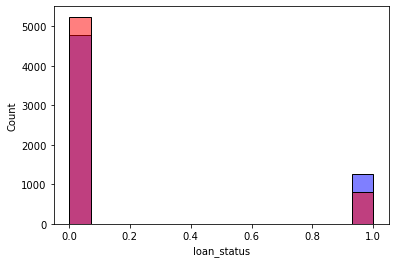

In [153]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# Support Vector Classifier

In [154]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [155]:
y_pred=classifier.predict(X_test_transformed)

In [156]:
#from sklearn import metrics
b=metrics.accuracy_score(y_pred,y_test)

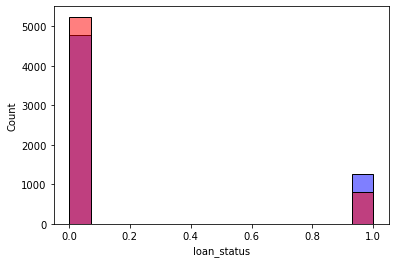

In [157]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# KNeighborsClassifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [159]:
y_test_pred=classifier.predict(X_test_transformed)

In [160]:
c=metrics.accuracy_score(y_test_pred,y_test)

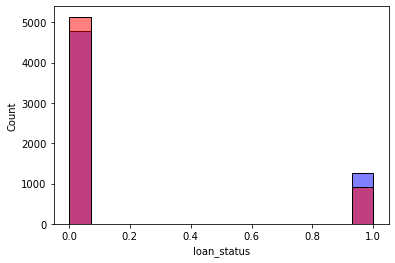

In [161]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# DecisionTreeClassifier

In [162]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [163]:
y_test_pred=classifier.predict(X_test_transformed)

In [164]:
d=metrics.accuracy_score(y_test_pred,y_test)

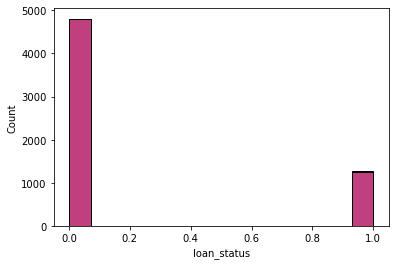

In [165]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

# RandomForestClassifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [167]:
y_test_pred=classifier.predict(X_test_transformed)

In [168]:
e=metrics.accuracy_score(y_test_pred,y_test)

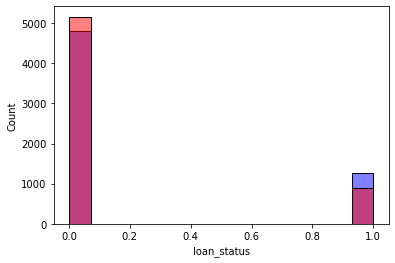

In [169]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [171]:
df_data = [['Logistic Classifier', a, str(round((a*100),2))+'%'],
                 ['Decision Tree Classifier',d,str(round((d*100),2))+'%'],
                 ['Support Vector Classifier',b,str(round((b*100),2))+'%'],
                 ['Random Forest Classifier ',e,str(round((e*100),2))+'%'],
            ['k-Nearest nebhiour',c,str(round((c*100),2))+'%']]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy','Accuracy %'])

In [172]:
data

,Algorithm,Accuracy,Accuracy %
0,Logistic Classifier,0.848580,84.86%
1,Decision Tree Classifier,0.890357,89.04%
2,Support Vector Classifier,0.888871,88.89%
3,Random Forest Classifier,0.927675,92.77%
4,k-Nearest nebhiour,0.886889,88.69%


 # conclusion
 
 * LogisticRegression---0.8485799207397622
 * Support Vector Classifier  --- 0.8888705416116248
 * KNN Classifier  ---0.886889035667107
 * Decision Tree classifier --- 0.887549537648613
 * Random Forest Classifier ---0.9275099075297226
 
  * NOTE :- By observations of all above Machine learnig `Random Forest Classifier` is best predication 